# This program will be used to read through individual excel files and extract the data for plotting
# For MRC step stimulation data

In [15]:
import pandas as pd
import matplotlib.pyplot as plt 
import os
import csv
import glob
import seaborn as sns
import numpy as np


In [32]:
# enter pathway of where files are saved 
# C:\Users\LingxinW\Box\Wang\Ephys_recording\ALM_ephys\ExtractedData
fpath = 'C:/Users/LingxinW/Box/Wang/Everyday working folders/Ephys_recording/ALM_ephys/ExtractedData/MRC/'
all_files = glob.glob(fpath + "/*.csv")

In [33]:
pwd

'C:\\Users\\LingxinW\\Google Drive\\PythonScripts\\EphysAnalysis'

In [34]:
# put all individual csv dataframe files into one dataframe file df
analysis = pd.DataFrame()
for x in all_files:
    df = pd.read_csv(x)
    #f['t_half_act_on'][0]= ''
    analysis=pd.concat([analysis,df])
analysis.head()

,worm_strain,cell_ID,stim_um,amp_peaks_on,t_peaks_on,amp_peaks_off,t_peaks_off,t_start_act_on,t_start_act_off,t_half_act_on,t_half_act_off,t_half_decay_on,t_half_decay_off,group_number
0,TU2769,ALMLW001,1,-9.592923,0.1602,-8.539088,0.4552,0.1506,0.4492,4.8,3.0,16.8,19.6,2
1,TU2769,ALMLW001,3,-38.047764,0.1532,-35.030586,0.4544,0.1506,0.4492,1.3,2.6,11.2,13.0,2
2,TU2769,ALMLW001,5,-58.534940,0.1532,-56.523555,0.4526,0.1506,0.4492,1.3,1.7,9.4,12.4,2
3,TU2769,ALMLW001,7,-79.812770,0.1528,-68.087917,0.4532,0.1506,0.4492,1.1,2.0,10.0,9.6,2
4,TU2769,ALMLW001,9,-86.572711,0.1526,-71.721998,0.4528,0.1506,0.4492,1.0,1.8,11.6,9.6,2


In [35]:
analysis['worm_strain'] # here is just to confirm all files are concatinated 

0    TU2769
1    TU2769
2    TU2769
3    TU2769
4    TU2769
      ...  
1     GN932
2     GN932
3     GN932
4     GN932
5     GN932
Name: worm_strain, Length: 120, dtype: object

In [36]:
# change negative current value to positive for plotting purpose and display purpose

analysis['amp_peaks_on']=-analysis['amp_peaks_on']

analysis['amp_peaks_on']

0     9.592923
1    38.047764
2    58.534940
3    79.812770
4    86.572711
       ...    
1    23.047052
2    31.628964
3    34.993153
4    41.560700
5    49.674714
Name: amp_peaks_on, Length: 120, dtype: float64

No handles with labels found to put in legend.
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


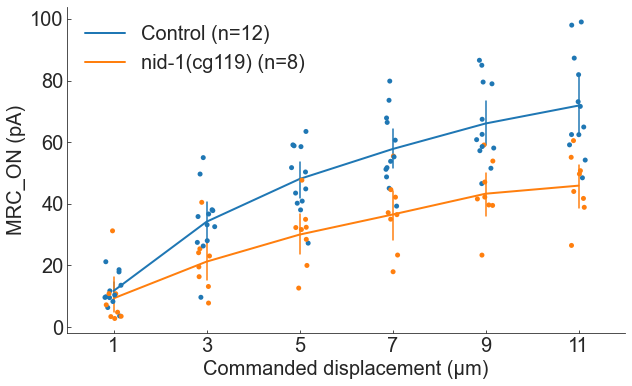

In [41]:
# plot the figures using seaborn 
# plot MRC_ON amplitude

sns.set_style('white')
sns.set_style('ticks', {'xtick.direction': 'in', 'ytick.direction': 'in'})
#sns.despine(offset=2, trim=True, top = False, right = False)
plt.rcParams.update({'font.size': 20})
plt.rcParams['svg.fonttype'] = 'none'

 


#%% plotting specific data from dataframe
#order = ['TU2769', 'GN932']
#xticklabels = ['WT', 'mutant']


plt.figure(figsize=(10,6))
plt.legend(loc='upper right')
sns.despine(right=True) # remove axis spines of right and up

labels, uniques = pd.factorize(analysis['stim_um'], sort = True) # to help plot lineplot and stripplot together

fig = sns.lineplot(x=labels, y=analysis['amp_peaks_on'], data=analysis, hue = 'worm_strain', err_style ='bars',  lw=2)

fig = sns.stripplot(x='stim_um', y='amp_peaks_on', data=analysis, hue = 'worm_strain')
#fig = sns.boxplot(x='stim_um', y='amp_peaks_on', data=analysis, hue = 'worm_strain',dodge=False)

handles, labels = fig.get_legend_handles_labels() # and next line code to remove legend title
plt.legend(handles=handles[1:], labels=labels[1:])# 
plt.legend(['Control (n=12)', 'nid-1(cg119) (n=8)'], frameon = False, prop={'size': 20}) # change figure label from strain name to genotype
plt.ylabel('MRC_ON (pA)')
plt.xlabel('Commanded displacement (\u03bcm)')

plt.savefig('MRC_ON.svg')
#fig2 = sns.stripplot(x='stim_um', y='t_half_act_on', data=analysis, alpha=0.5,order=order)  color_palette=("RdBu",n=2),

#plt.xticks(np.arange(len(order)), xticklabels, rotation=90)  # Set text labels and properties.


In [42]:
# change negative current value to positive for plotting purpose and display purpose
analysis['amp_peaks_off']=-analysis['amp_peaks_off']

analysis['amp_peaks_off']


0     8.539088
1    35.030586
2    56.523555
3    68.087917
4    71.721998
       ...    
1    18.893886
2    24.411847
3    29.875321
4    35.209631
5    36.797573
Name: amp_peaks_off, Length: 120, dtype: float64

No handles with labels found to put in legend.
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 432x288 with 0 Axes>

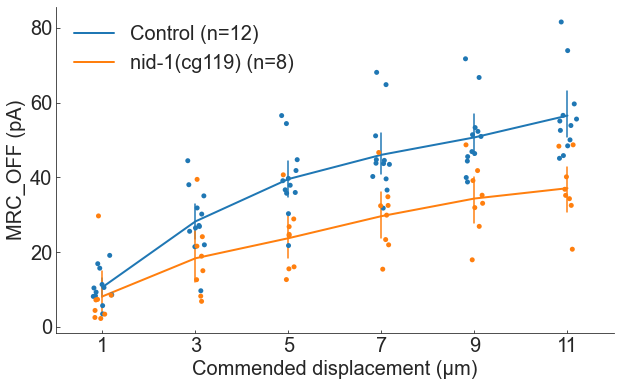

In [47]:
# plot the figures using seaborn 
# plot MRC_OFF amplitude

sns.set_style('white')
sns.set_style('ticks', {'xtick.direction': 'in', 'ytick.direction': 'in'})
sns.despine(offset=2, trim=True)
plt.rcParams.update({'font.size': 20})
plt.rcParams['svg.fonttype'] = 'none'

plt.figure(figsize=(10,6))
plt.legend(loc='upper right')
sns.despine(right=True) # remove axis spines of right and up

labels, uniques = pd.factorize(analysis['stim_um'], sort = True) # to help plot lineplot and stripplot together

fig = sns.lineplot(x=labels, y=analysis['amp_peaks_off'], data=analysis, hue = 'worm_strain', err_style ='bars',  lw=2)

fig = sns.stripplot(x='stim_um', y='amp_peaks_off', data=analysis, hue = 'worm_strain')

handles, labels = fig.get_legend_handles_labels() # and next line code to remove legend title
plt.legend(handles=handles[1:], labels=labels[1:])# 
plt.legend(['Control (n=12)' , 'nid-1(cg119) (n=8)'], frameon = False, prop={'size': 20}) # change figure label from strain name to genotype
plt.ylabel('MRC_OFF (pA)')
plt.xlabel('Commended displacement (\u03bcm)')

plt.savefig('MRC_OFF.svg')

In [10]:
#analysis2=analysis[(analysis['stim_um']>1)]
#analysis2

In [11]:
#analysis['t_half_act_on']=NaN
#analysis['t_half_act_on']

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

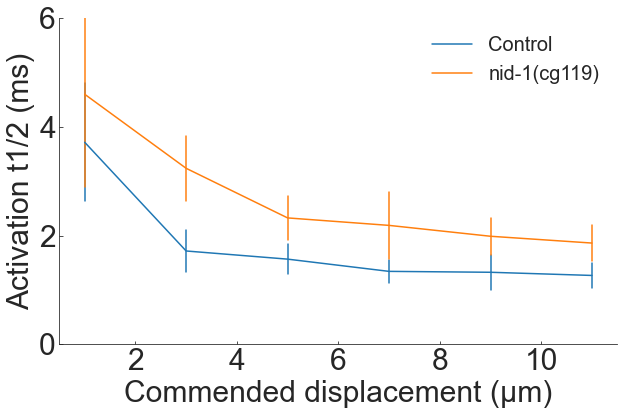

In [12]:
# plot the figures using seaborn 
# plot MRC_ON Activation t1/2



sns.set_style('white')
sns.set_style('ticks', {'xtick.direction': 'in', 'ytick.direction': 'in'})
sns.despine(offset=2, trim=True)
plt.rcParams.update({'font.size': 30})
plt.rcParams['svg.fonttype'] = 'none'

plt.figure(figsize=(10,6))
plt.legend(loc='upper right')
sns.despine(right=True) # remove axis spines of right and up
plt.ylim(0,6)
fig = sns.lineplot(x='stim_um', y='t_half_act_on', data=analysis, hue = 'worm_strain', err_style ='bars', ci = 'sd')
handles, labels = fig.get_legend_handles_labels() # and next line code to remove legend title
plt.legend(handles=handles[1:], labels=labels[1:])# 
plt.legend(['Control', 'nid-1(cg119)'], frameon = False, prop={'size': 20}) # change figure label from strain name to genotype
plt.ylabel('Activation t1/2 (ms)')
plt.xlabel('Commended displacement (\u03bcm)')

plt.savefig('MRC_ON_acthalf.tif')

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

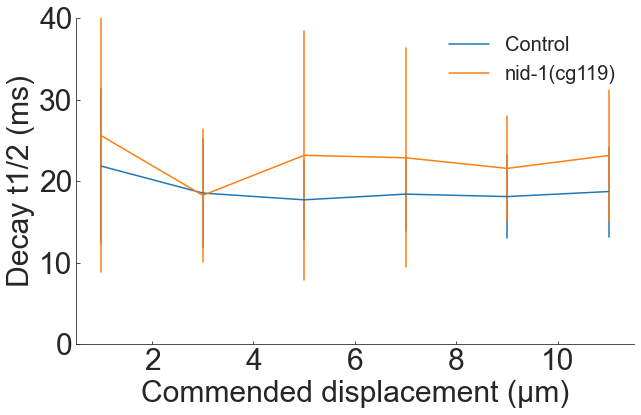

In [13]:
# plot the figures using seaborn 
# plot MRC_ON Decay t1/2

sns.set_style('white')
sns.set_style('ticks', {'xtick.direction': 'in', 'ytick.direction': 'in'})
sns.despine(offset=2, trim=True)
plt.rcParams.update({'font.size': 30})
plt.rcParams['svg.fonttype'] = 'none'

plt.figure(figsize=(10,6))
plt.legend(loc='upper right')
sns.despine(right=True) # remove axis spines of right and up
plt.ylim(0,40)
fig = sns.lineplot(x='stim_um', y='t_half_decay_on', data=analysis, hue = 'worm_strain', err_style ='bars', ci='sd')
handles, labels = fig.get_legend_handles_labels() # and next line code to remove legend title
plt.legend(handles=handles[1:], labels=labels[1:])# 
plt.legend(['Control', 'nid-1(cg119)'], frameon = False, prop={'size': 20}) # change figure label from strain name to genotype
plt.ylabel('Decay t1/2 (ms)')
plt.xlabel('Commended displacement (\u03bcm)')

plt.savefig('MRC_ON_decayhalf.tif')

In [14]:
# one or two value in first stimulation was very big because of noise
# remove that number
analysis2=analysis[analysis['t_half_act_off'] < 10]

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

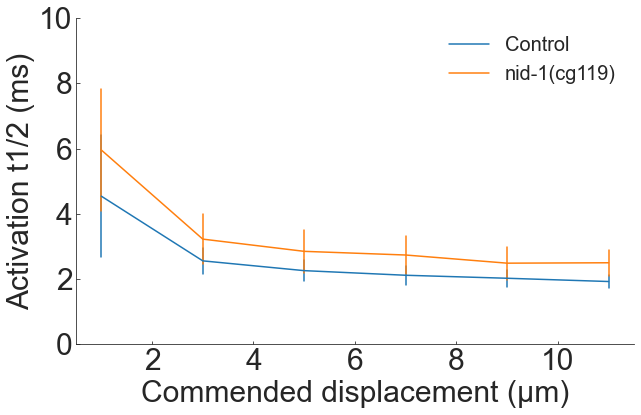

In [15]:
# plot the figures using seaborn 
# plot MRC_OFF Activation t1/2

sns.set_style('white')
sns.set_style('ticks', {'xtick.direction': 'in', 'ytick.direction': 'in'})
sns.despine(offset=2, trim=True)
plt.rcParams.update({'font.size': 30})
plt.rcParams['svg.fonttype'] = 'none'

plt.figure(figsize=(10,6))
plt.legend(loc='upper right')
sns.despine(right=True) # remove axis spines of right and up
plt.ylim(0,10)
fig = sns.lineplot(x='stim_um', y='t_half_act_off', data=analysis2, hue = 'worm_strain', err_style ='bars', ci='sd')
handles, labels = fig.get_legend_handles_labels() # and next line code to remove legend title
plt.legend(handles=handles[1:], labels=labels[1:])# 
plt.legend(['Control', 'nid-1(cg119)'], frameon = False, prop={'size': 20}) # change figure label from strain name to genotype
plt.ylabel('Activation t1/2 (ms)')
plt.xlabel('Commended displacement (\u03bcm)')

plt.savefig('MRC_OFF_acthalf.tif')

In [16]:
# one or two value in first stimulation was very big because of noise
# remove that number
analysis3=analysis[analysis['t_half_decay_off'] < 80]

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

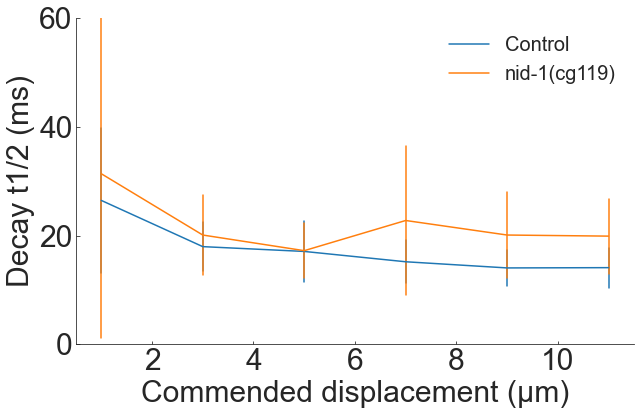

In [17]:
# plot the figures using seaborn 
# plot MRC_OFF Decay t1/2

sns.set_style('white')
sns.set_style('ticks', {'xtick.direction': 'in', 'ytick.direction': 'in'})
sns.despine(offset=2, trim=True)
plt.rcParams.update({'font.size': 30})
plt.rcParams['svg.fonttype'] = 'none'

plt.figure(figsize=(10,6))
plt.legend(loc='upper right')
sns.despine(right=True) # remove axis spines of right and up
plt.ylim(0,60)
fig = sns.lineplot(x='stim_um', y='t_half_decay_off', data=analysis3, hue = 'worm_strain', err_style ='bars', ci='sd')
handles, labels = fig.get_legend_handles_labels() # and next line code to remove legend title
plt.legend(handles=handles[1:], labels=labels[1:])# 
plt.legend(['Control', 'nid-1(cg119)'], frameon = False, prop={'size': 20}) # change figure label from strain name to genotype
plt.ylabel('Decay t1/2 (ms)')
plt.xlabel('Commended displacement (\u03bcm)')

plt.savefig('MRC_OFF_decayhalf.tif')